# House price prediction using multiple linear regression model and random forest

###  Importing python libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading csv file

In [5]:
house= pd.read_csv("kc_house_data.csv")

In [6]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house.shape

(21613, 21)

Dataset has 21613 records and 21 variables

## Variables Description

Variable-Description

id-Identification

date-Date sold

price-Sale price

bedrooms-Number of bedrooms

bathrooms-Number of bathrooms

sqft_liv-Size of living area in square feet

sqft_lot-Size of the lot in square feet

floors-Number of floors

waterfront-‘1’ if the property has a waterfront, ‘0’ if not.

view-An index from 0 to 4 of how good the view of the property was

condition	-ondition of the house, ranked from 1 to 5

grade-Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty

sqft_above-Square feet above ground

sqft_basmt-Square feet below ground

yr_built-Year built

yr_renov-Year renovated. ‘0’ if never renovated

zipcode-5 digit zip code

lat	Latitude

long	Longitude

squft_liv15-	Average size of interior housing living space for the closest 15 houses, in square feet

squft_lot15-	Average size of land lots for the closest 15 houses, in square feet


# 

##  Identify the type of variables in the dataset. Variables are of two types — Numerical and Categorical.

Variables are two types
1.Nominal 2. Ordinal

Nominal
1.Discrete
    Id,Bedrooms,Date,Bathrooms,floors,grade,Yr_built,yr_Renov
    
2.Continuos
    PRICE,SQRT_LIV,SQRT_LOt,sqft_above,sqft_basmt,sqft_liv15,sqft_lot15
    
Categorical

waterfront,view,condition,grade

The target value is price, and the rest 20 features can be assumed as the predictor variables.



In [8]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

date is an objective type , we have to convert it into datetime type 

##  Statistical Summary of Numeric Variables:

In [9]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Pandas describe() is used to display some basic statistical information of a data frame or a sequence of numeric values, such as count, percentiles, mean, standard deviation, and maximum value. We can use this method to find missing values because it offers the count of each variable.

## Handling missing values

In [10]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Handling duplicate values

In [11]:
duplicate = house[house.duplicated()]
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


# Univariate  Analysis:


## numeric variables

In [12]:
house["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
house["bedrooms"].nunique()

13

In [14]:
house["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

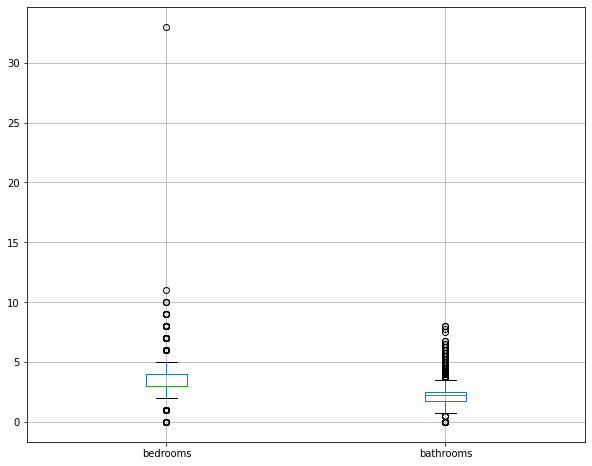

In [15]:
boxplot= house.boxplot(column=['bedrooms',"bathrooms"],figsize=(10,8))

From above box plot we can see outliers

## categorical variables

Count Plots:
A count plot can be thought of as a histogram across a categorical, instead of numeric, variable. It is used to find the frequency of each category.

/Users/KalyanMuddapu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='count'>

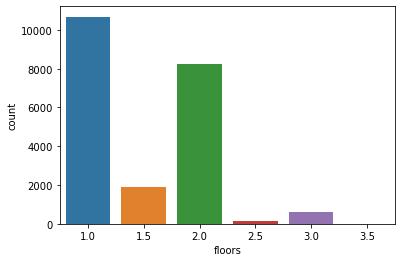

In [16]:
sns.countplot(house.floors)

/Users/KalyanMuddapu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

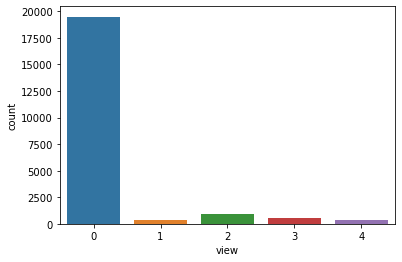

In [17]:
sns.countplot(house.view)

/Users/KalyanMuddapu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

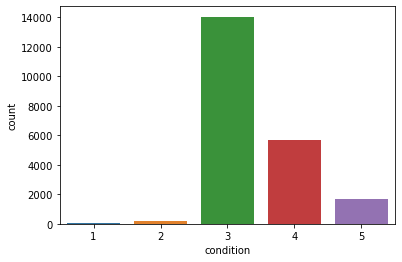

In [18]:
sns.countplot(house.condition)

/Users/KalyanMuddapu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

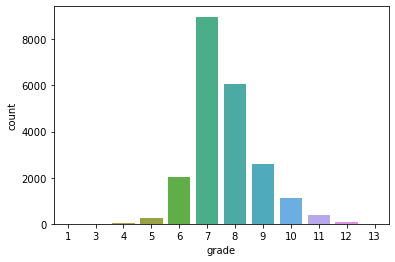

In [19]:
sns.countplot(house.grade)

/Users/KalyanMuddapu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='count'>

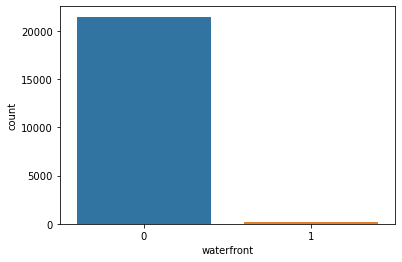

In [20]:
sns.countplot(house.waterfront)

## Univariate Analysis for Continuouse variables

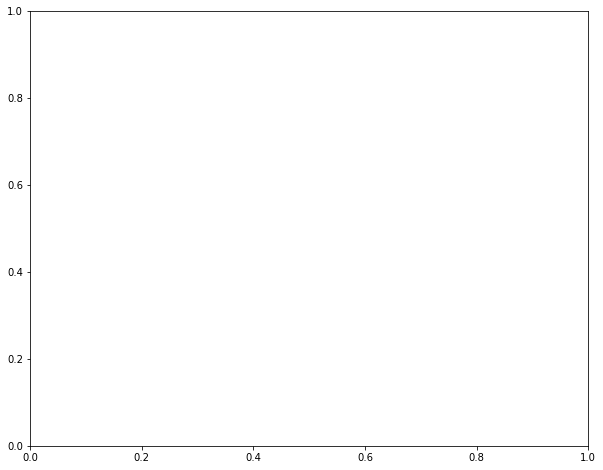

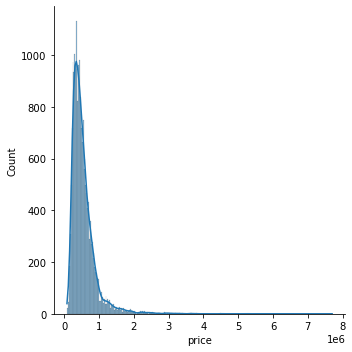

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.displot(house.price,kde=True)

<AxesSubplot:>

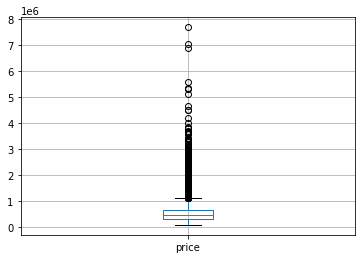

In [22]:
house.boxplot(column=["price"])

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <BarContainer object of 10 artists>)

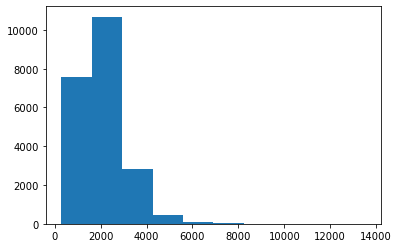

In [23]:
plt.hist(house["sqft_living"])

<AxesSubplot:>

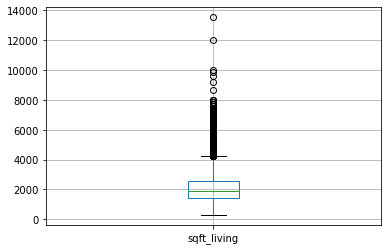

In [24]:
house.boxplot(column=["sqft_living"])

<AxesSubplot:>

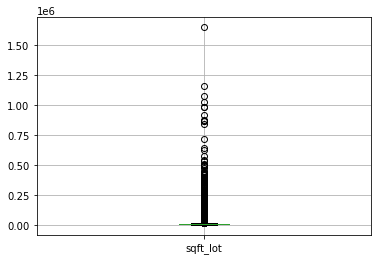

In [25]:
house.boxplot(column=["sqft_lot"])

In [26]:
# Before removing outlier , I wanted to store my dataset 


hs_sales = house.copy()

#hs_sales.max()
#house_sales.head()
hs_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Handling outliers

Looking at the box plot, it appears that the variables  have an outlier in them. The value of these outliers must be treated, and there are several approaches to do so:

Drop the outlier value

Replace the outlier value using the IQR

In [27]:

min_bedrooms = hs_sales['bedrooms'].quantile(0.10)
max_bedrooms = hs_sales['bedrooms'].quantile(0.99)
min_bedrooms,max_bedrooms 

(2.0, 6.0)

In [28]:
hs_sales[hs_sales['bedrooms']<8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [29]:
min_bath = hs_sales['bathrooms'].quantile(0.10)
max_bath = hs_sales['bathrooms'].quantile(0.99)
min_bath,max_bath  

(1.0, 4.25)

In [30]:
# For bathrooms , I am keeping max threshold as 6

hs_sales[hs_sales['bathrooms']<6]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [31]:
rmv_outliers = hs_sales[(hs_sales['bedrooms']<8) & (hs_sales['bathrooms']<8)]
rmv_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
house_sales = rmv_outliers.copy()

In [33]:
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Bivariate Analysis

this gives the relationship between the two variables, hence its called bivariate analysis.Here I am trying to find relation between target variable and other indiependent variables

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

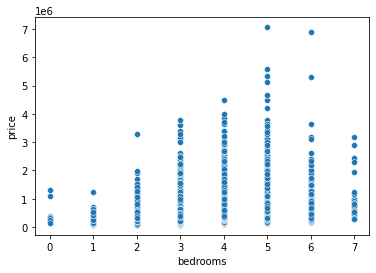

In [34]:
sns.scatterplot(x="bedrooms",y="price",data=house_sales)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

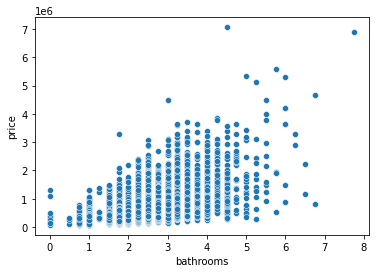

In [35]:
sns.scatterplot(x="bathrooms",y="price",data=house_sales)

<AxesSubplot:xlabel='view', ylabel='price'>

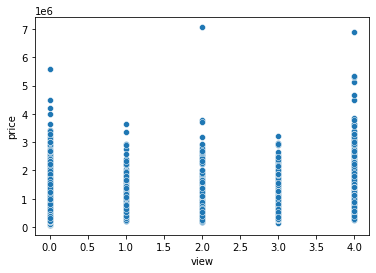

In [36]:
sns.scatterplot(x="view",y="price",data=house_sales)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

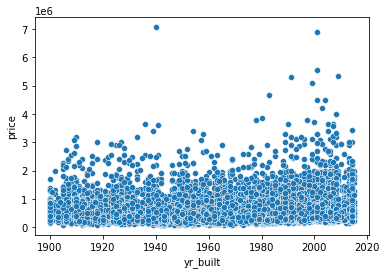

In [37]:
sns.scatterplot(x="yr_built",y="price",data=house_sales)

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

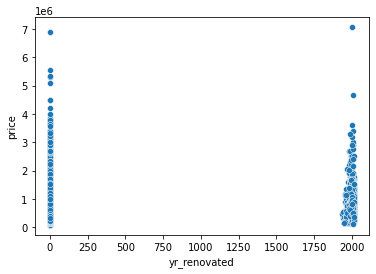

In [38]:
sns.scatterplot(x="yr_renovated",y="price",data=house_sales)

<AxesSubplot:xlabel='view', ylabel='price'>

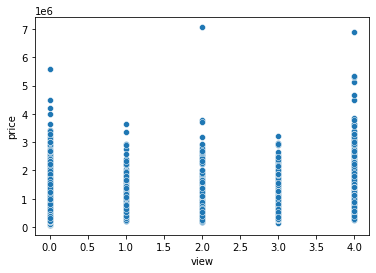

In [39]:
sns.scatterplot(x="view",y="price",data=house_sales)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

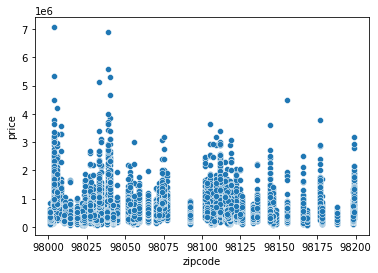

In [40]:
sns.scatterplot(x="zipcode",y="price",data=house_sales)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

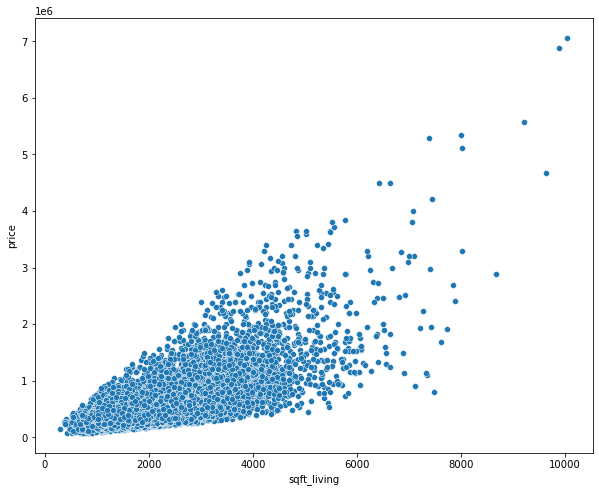

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x="sqft_living",y="price",data=house_sales)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

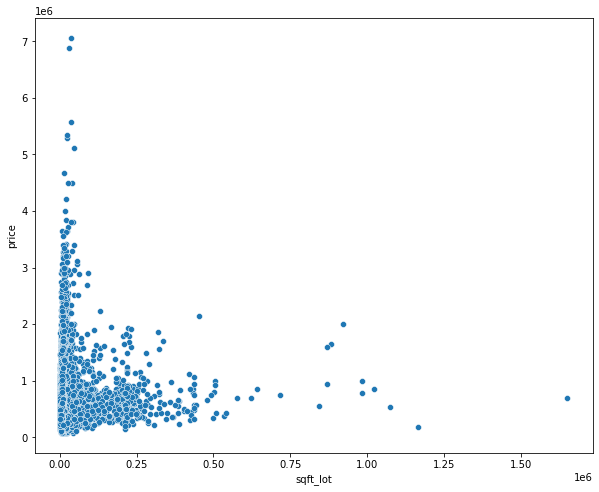

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x="sqft_lot",y="price",data=house_sales)

<AxesSubplot:xlabel='floors', ylabel='price'>

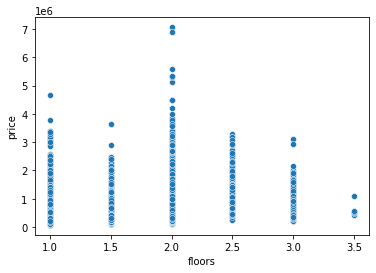

In [43]:
sns.scatterplot(x="floors",y="price",data=house_sales)

<AxesSubplot:xlabel='condition', ylabel='price'>

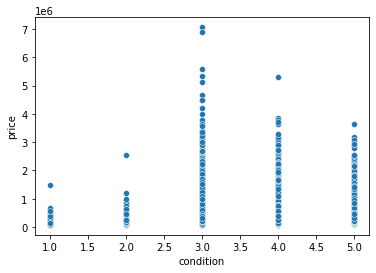

In [44]:
sns.scatterplot(x="condition",y="price",data=house_sales)

<AxesSubplot:xlabel='grade', ylabel='price'>

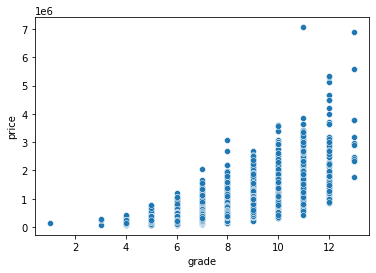

In [45]:
sns.scatterplot(x="grade",y="price",data=house_sales)

In [46]:
drop_features= house_sales[['id','lat','long','date']]

There are some features which are not needed for our predictive analysis, So we are going to drop some features. They are Is, Longitude,Lattitude.

In [47]:
house_sales = house_sales.drop(drop_features,axis=1)

In [48]:
house_sales.shape

(21587, 17)

# Correlation Matrix

In [49]:
corr=house_sales.corr().abs()
features = corr["price"].sort_values(ascending=False)
features

price            1.000000
sqft_living      0.699844
grade            0.669428
sqft_above       0.603268
sqft_living15    0.587439
bathrooms        0.522897
view             0.397786
sqft_basement    0.318153
bedrooms         0.314598
waterfront       0.269845
floors           0.256034
yr_renovated     0.123717
sqft_lot         0.089194
sqft_lot15       0.082227
yr_built         0.057939
zipcode          0.054099
condition        0.035024
Name: price, dtype: float64

<AxesSubplot:>

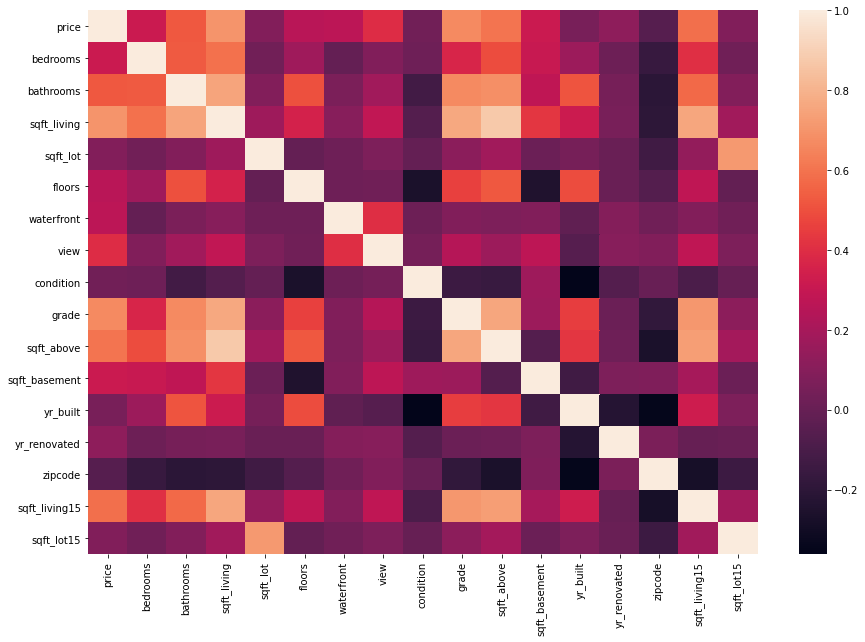

In [50]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(house_sales.corr())

##  multicollinearity test

Multicollinearity can affect any regression model with more than one predictor. It occurs when two or more predictor variables overlap so much in what they measure that their effects are indistinguishable. 

In [51]:

# Select upper triangle of correlation matrix 
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)) 
upper

# Find index of feature columns with correlation greater than 0.8 
to_drop = [column for column in upper if any(upper[column] > 0.8)]

In [52]:
to_drop

['sqft_above']

In [53]:
house_sales=house_sales.drop(to_drop, axis=1)

In [54]:
house_sales.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Predicting House sale price using linear regression model

In [55]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [56]:
X=house_sales.drop("price" ,axis=1)
y=house_sales["price"]

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state =234)

In [57]:
lm = linear_model.LinearRegression() 

model=lm.fit(X_train,y_train)
model

LinearRegression()

In [58]:
lm.coef_

array([-4.48722637e+04,  4.73354026e+04,  1.63829024e+02, -5.54606294e-03,
        2.01346136e+04,  5.89552851e+05,  4.20329715e+04,  1.96738555e+04,
        1.19177138e+05,  3.04794850e+00, -3.52615459e+03,  1.09559778e+01,
       -2.97601270e+01,  2.78028997e+01, -5.27663446e-01])

In [59]:
lm.intercept_

9044808.030182533

In [60]:
lm.score(X_test,y_test)

0.651163235406538

We have got 64 percent accuracy score, 

##  Random Forest 

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [62]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train) 
rf.score(X_test,y_test)


0.8276406563040175

In [63]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test), squared=False)))
print('r2 score: %.2f' % r2_score(y_test, rf.predict(X_test)))


RMSE: 381.0531067993
r2 score: 0.83


###  We got a better accuracy score in Random forest than linear model.